## <font color = darkblue> Dimension Reduction Techniques

# <font color = red> Important note: Do not install umap, but rather umap-learn


In [30]:
# !pip install umap-learn
# import umap

# !pip uninstall umap

In [45]:
# list(document_term_df)[1520:]


## 1) Dimension Reduction using PCA

In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap

# Define the number of components to reduce to
n_components = 2



In [43]:
print(datetime.datetime.now().time())

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(document_term_df)

print(datetime.datetime.now().time())


Variance explained by each component:
Component 1: 98.36% (cumulative: 98.36%)
Component 2: 0.15% (cumulative: 98.51%)
Component 3: 0.08% (cumulative: 98.59%)
Component 4: 0.07% (cumulative: 98.67%)
Component 5: 0.07% (cumulative: 98.73%)
Component 6: 0.06% (cumulative: 98.79%)
Component 7: 0.05% (cumulative: 98.85%)
Component 8: 0.04% (cumulative: 98.88%)
Component 9: 0.03% (cumulative: 98.92%)


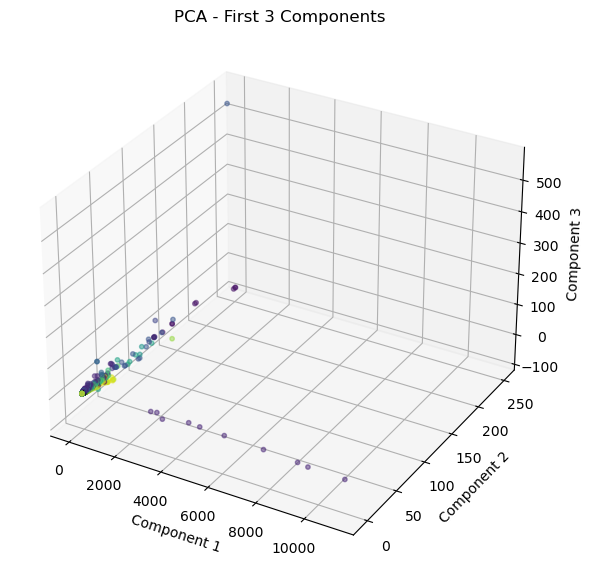

In [47]:

# Display variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print("Variance explained by each component:")
for i, (evr, cev) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance), start=1):
    if i < 10:
        print(f"Component {i}: {evr*100:.2f}% (cumulative: {cev*100:.2f}%)")

# Visualize first three components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x, y, z = pca_result[:, 0], pca_result[:, 1], pca_result[:, 2]
ax.scatter(x, y, z, c=newsgroups.target, cmap='viridis', s=10, alpha=0.5)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('PCA - First 3 Components')

plt.show()


## 2) Dimension Reduction using t-SNE

In [ ]:
print(datetime.datetime.now().time())
# Perform t-SNE
tsne = TSNE(n_components=n_components, random_state=42)
tsne_result = tsne.fit_transform(document_term_df)
print(datetime.datetime.now().time())


## 3) Dimension Reduction using LLE (locally linear embedding)

In [ ]:

# Perform LLE
lle = LocallyLinearEmbedding(n_components=n_components, random_state=42)
lle_result = lle.fit_transform(document_term_df)


## 4) Dimension Reduction using IsoMAP and UMAP
- Also combining results from all five techniques

In [ ]:


# Perform Isomap
isomap = Isomap(n_components=n_components)
isomap_result = isomap.fit_transform(document_term_df)

# Perform UMAP
umap_result = umap.UMAP(n_components=n_components, random_state=42).fit_transform(document_term_df)

# Store the results in a dictionary
results = {
    'PCA': pca_result,
    't-SNE': tsne_result,
    'LLE': lle_result,
    'Isomap': isomap_result,
    'UMAP': umap_result,
}

# Print the results
for method, result in results.items():
    print(f"{method} result shape: {result.shape}")
    print(result[:5, :])  # Print the first 5 rows
    print()


## t-SNE on IRIS data

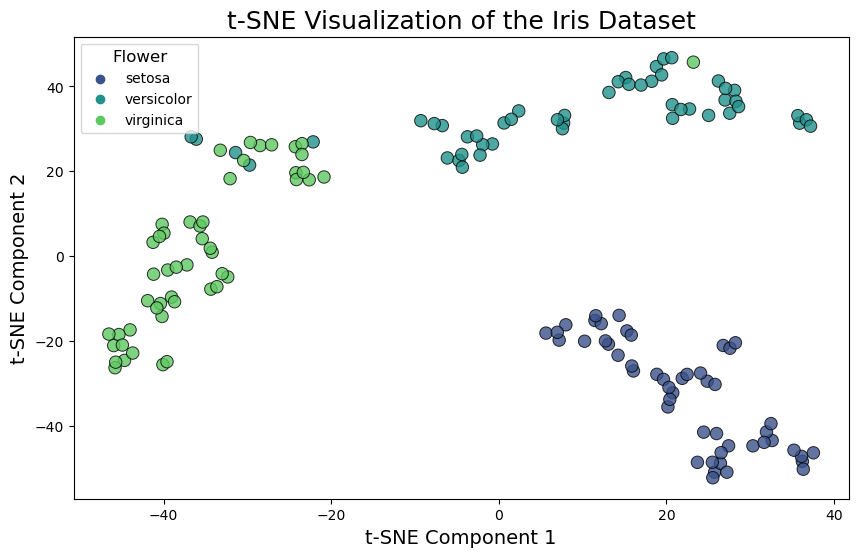

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import random
import warnings
warnings.filterwarnings('ignore')


# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
flower_names = iris.target_names

# Apply t-SNE on the Iris data
tsne = TSNE(n_components=2, perplexity=5, random_state=100)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with t-SNE components and flower names
tsne_df = pd.DataFrame(X_tsne, columns=['tsne_1', 'tsne_2'])
tsne_df['flower'] = [flower_names[i] for i in y]

# Visualize t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='tsne_1', y='tsne_2', hue='flower', palette='viridis', s=80, alpha=0.8, edgecolor='k')
plt.title('t-SNE Visualization of the Iris Dataset', fontsize=18)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.legend(title='Flower', title_fontsize=12, fontsize=10)
plt.show()


## <font color = darkblue> Dimension reduction on nutrition data

In [69]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import datetime 
import numpy as np

%cd '/Users/p.mittal/Data'
os.listdir()

nut = pd.read_csv('Final_Nutrition.csv')
nut.shape

/Users/p.mittal/Data


(8789, 43)

In [70]:
# nut.iloc[:,5:].head()

nut2 = nut.iloc[:,1:30]

# Remove rows with NaN values
nut3 = nut2.dropna()
print("\nDataFrame after removing rows with NaN values:")
print(nut3.shape)

# Fill NaN values with 0
nut4 = nut2.fillna(0)
print("\nDataFrame after filling NaN values with 0:")
print(nut4.shape)


# Scale only numerical columns
scaler = StandardScaler()
numerical_columns = nut4.select_dtypes(include=['number']).columns

nut4[numerical_columns] = scaler.fit_transform(nut4[numerical_columns])

print("\nDataFrame with scaled numerical columns:")
nut4.head()




DataFrame after removing rows with NaN values:
(3868, 29)

DataFrame after filling NaN values with 0:
(8789, 29)

DataFrame with scaled numerical columns:


,Shrt_Desc,Long_Desc,FdGrp_Desc,Water_g,Energ_Kcal,Protein_g,Lipid_Tot_g,Carbohydrt_g,Fiber_TD_g,Sugar_Tot_g,...,Selenium_g,Vit_C_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,Vit_B6_mg,Folate_Tot_g,Folic_Acid_g,Food_Folate_g,Choline_Tot__mg
0,"BUTTER,WITH SALT","Butter, salted",Dairy and Egg Products,-1.242786,2.889075,-0.996734,4.461827,-0.809175,-0.477888,-0.488135,...,-0.412687,-0.127345,-0.397643,-0.456361,-0.704748,-0.552344,-0.321828,-0.175107,-0.293829,-0.095097
1,"BUTTER,WHIPPED,W/ SALT","Butter, whipped, with salt",Dairy and Egg Products,-1.215163,2.894962,-1.030922,4.284136,-0.706111,-0.477888,-0.488135,...,-0.448337,-0.127345,-0.393724,-0.388371,-0.708945,-0.541653,-0.313995,-0.175107,-0.276198,-0.095097
2,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",Dairy and Egg Products,-1.750728,3.825182,-1.050865,5.623458,-0.811375,-0.477888,-0.492509,...,-0.448337,-0.127345,-0.405481,-0.522085,-0.712932,-0.556620,-0.345327,-0.175107,-0.346724,-0.026910
3,"CHEESE,BLUE","Cheese, blue",Dairy and Egg Products,-0.380292,0.746037,0.954832,1.150199,-0.725550,-0.477888,-0.456061,...,0.068591,-0.127345,-0.350615,0.332328,-0.500342,-0.203820,-0.063335,-0.175107,0.288006,-0.161336
4,"CHEESE,BRICK","Cheese, brick",Dairy and Egg Products,-0.422540,0.852011,1.129571,1.209640,-0.709045,-0.477888,-0.455332,...,0.068591,-0.127345,-0.380007,0.262071,-0.688798,-0.419777,-0.188665,-0.175107,0.005904,-0.161336


In [6]:
print(datetime.datetime.now().time())

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(nut4.iloc[:,5:])

print(datetime.datetime.now().time())


07:40:48.821198
07:40:48.852298


Variance explained by each component:
Component 1: 24.25% (cumulative: 24.25%)
Component 2: 11.02% (cumulative: 35.26%)
Component 3: 8.90% (cumulative: 44.16%)
Component 4: 5.58% (cumulative: 49.74%)
Component 5: 4.85% (cumulative: 54.59%)
Component 6: 4.57% (cumulative: 59.16%)
Component 7: 4.15% (cumulative: 63.31%)
Component 8: 4.10% (cumulative: 67.40%)
Component 9: 4.00% (cumulative: 71.41%)
Component 10: 3.46% (cumulative: 74.87%)
Component 11: 3.28% (cumulative: 78.15%)
Component 12: 3.14% (cumulative: 81.29%)
Component 13: 2.86% (cumulative: 84.15%)
Component 14: 2.48% (cumulative: 86.63%)
Component 15: 2.20% (cumulative: 88.83%)
Component 16: 2.11% (cumulative: 90.94%)
Component 17: 1.82% (cumulative: 92.76%)
Component 18: 1.62% (cumulative: 94.37%)


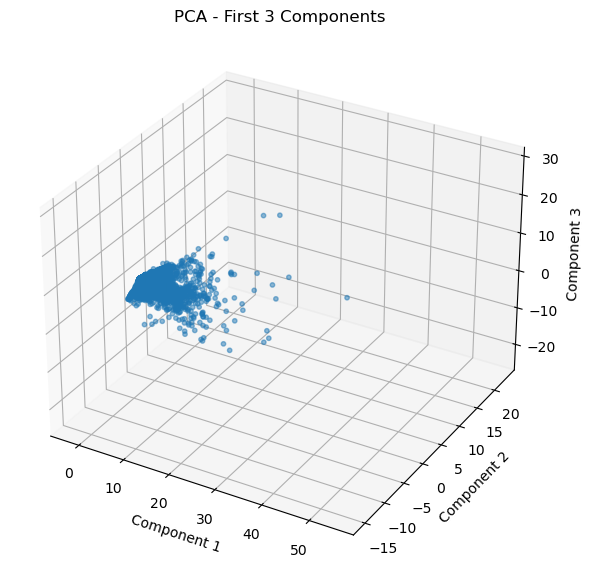

In [7]:

# Display variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the desired explained variance threshold (e.g., 0.95 for 95%)
variance_threshold = 0.95


# Find the number of principal components required to reach the threshold
num_components = np.where(cumulative_explained_variance >= variance_threshold)[0][0] + 1


print("Variance explained by each component:")
for i, (evr, cev) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance), start=1):
    if i < num_components:
        print(f"Component {i}: {evr*100:.2f}% (cumulative: {cev*100:.2f}%)")

# Visualize first three components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x, y, z = pca_result[:, 0], pca_result[:, 1], pca_result[:, 2]
ax.scatter(x, y, z, cmap='viridis', s=10, alpha=0.5)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('PCA - First 3 Components')

plt.show()


In [19]:
print(datetime.datetime.now().time())
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(nut4.iloc[:,5:])
print(datetime.datetime.now().time())


07:47:08.889166


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


07:47:22.280049


In [20]:
print(datetime.datetime.now().time())

# Perform LLE
lle = LocallyLinearEmbedding(n_components=n_components, random_state=42)
lle_result = lle.fit_transform(nut4.iloc[:,5:])
print(datetime.datetime.now().time())


07:47:22.284478
07:47:24.436800


In [21]:
print(datetime.datetime.now().time())

# Perform Isomap
isomap = Isomap(n_components=n_components)
isomap_result = isomap.fit_transform(nut4.iloc[:,5:])
print(datetime.datetime.now().time())


07:47:48.416990


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 11 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3

07:48:12.678456


In [29]:
from umap.umap_ import UMAP

print(datetime.datetime.now().time())

# Perform UMAP
umap_result = UMAP(n_components=n_components, random_state=42).fit_transform(nut4.iloc[:,5:])

print(datetime.datetime.now().time())


In [ ]:
# At this stage filter data to only a handful of food groups and then visualize them

<IPython.core.display.Javascript object>

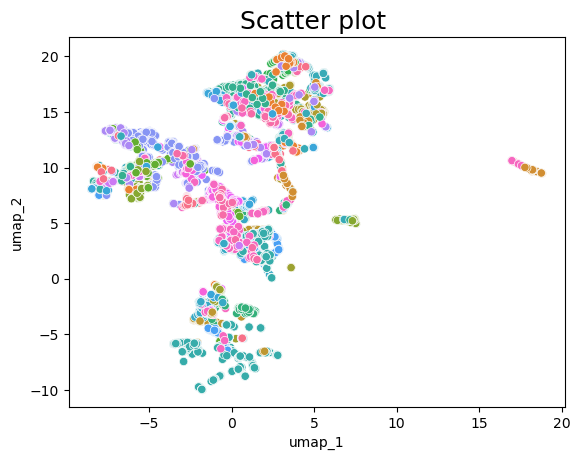

In [42]:

# Add UMAP components as columns to the DataFrame
nut4['umap_1'] = umap_result[:, 0]
nut4['umap_2'] = umap_result[:, 1]

nut4.head()

# Create a seaborn scatter plot of the Iris dataset
scatter_plot = sns.scatterplot(data=nut4, x='umap_1', y='umap_2', hue='FdGrp_Desc', legend = 'brief')
# Remove the legend
scatter_plot.legend_.remove()

plt.title('Scatter plot ', fontsize=18)
plt.show()
